# Layer 9

In [1]:
import pandas as pd
import numpy as np

# from google.colab import drive
# drive.mount('/content/drive')

# DATASET_PATH = "/content/drive/MyDrive/ML Project/layer 9"
DATASET_PATH = "layer 10"

In [2]:
# CSV files into Pandas DataFrames
train_df = pd.read_csv(f"{DATASET_PATH}/train.csv")
valid_df = pd.read_csv(f"{DATASET_PATH}/valid.csv")
test_df = pd.read_csv(f"{DATASET_PATH}/test.csv")

### Preprocess

In [3]:
temp = list(train_df.columns)

FEATURES = temp[:-4]
LABELS = temp[-4:]

In [4]:
# drop ID column from the test dataset
x_test = test_df.drop('ID', axis=1)

x_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
0,-0.063023,0.085030,-0.057909,0.024293,0.028695,-0.113796,0.028477,-0.006041,-0.132434,0.088144,...,-0.160050,0.078897,0.120168,-0.160152,-0.200884,0.046231,-0.115850,0.182974,0.047106,-0.118783
1,-0.036403,0.115930,-0.066521,0.045771,-0.027250,-0.164679,0.023611,0.056512,-0.171498,-0.021133,...,-0.137038,0.042576,0.006788,-0.207013,-0.205184,-0.053462,-0.003775,-0.035003,-0.041118,-0.079211
2,0.030672,0.045321,-0.163811,0.142376,-0.125894,-0.083943,-0.039693,-0.004867,-0.127951,0.111345,...,0.090191,0.038063,0.070423,-0.253409,-0.072147,0.016236,-0.144047,-0.122405,-0.063079,-0.188233
3,-0.000984,0.080593,-0.067086,0.005251,-0.141851,-0.125211,-0.016161,0.106323,-0.203491,-0.027378,...,-0.107041,0.028166,-0.073713,-0.073180,-0.109380,-0.027901,-0.006863,0.016840,-0.171139,0.086868
4,0.059806,0.088846,-0.058021,0.133098,-0.083380,-0.026724,-0.033793,-0.004055,-0.057890,-0.011114,...,0.047907,0.026333,0.012204,-0.245772,-0.044506,0.058273,-0.005203,-0.104552,0.002035,-0.091528


In [5]:
# dict to store train and valid dataset for each label
x_train = {}
y_train = {}
x_valid = {}
y_valid = {}

# seperate the train and valid datasets into labels
# remove the rows where label is NaN

for label in LABELS:

    train_df_temp = train_df[~np.isnan(train_df[label])]
    valid_df_temp = valid_df[~np.isnan(valid_df[label])]

    x_train[label] = train_df_temp.drop(LABELS, axis=1)
    y_train[label] = train_df_temp[label]
    x_valid[label] = valid_df_temp.drop(LABELS, axis=1)
    y_valid[label] = valid_df_temp[label]

In [6]:
x_train['label_2'].head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
480,0.053179,0.094833,-0.098983,0.131190,-0.031974,-0.049086,0.038929,0.091135,-0.107005,0.018532,...,0.073301,-0.008309,0.096050,-0.319057,-0.084282,0.057429,-0.064677,0.017584,-0.007926,-0.144536
481,0.033278,0.059124,-0.020353,0.168918,0.036165,-0.117302,-0.081979,-0.070096,-0.161345,0.106618,...,0.066489,0.002962,0.003712,-0.235858,-0.051955,0.121809,0.007508,0.074416,0.000140,0.115385
482,0.046853,0.076299,-0.012859,0.089680,0.046729,-0.000054,-0.045814,0.023595,-0.104441,0.025995,...,-0.054697,0.027111,0.087195,-0.142816,-0.202896,0.099567,-0.069376,0.061420,0.003834,0.000445
483,0.001946,0.060066,0.012458,0.001349,-0.057288,-0.219725,0.001473,0.036990,-0.210818,0.055353,...,-0.095423,0.013749,-0.041319,-0.207143,-0.175213,-0.030503,-0.081459,0.106127,0.039627,0.025073
484,0.046541,0.113568,-0.009204,0.058154,0.027733,-0.095826,0.072213,-0.013832,-0.007329,0.074815,...,-0.065764,0.016530,0.109589,-0.095758,-0.142571,0.081530,-0.058456,-0.049127,-0.061282,0.041392


### Classifires

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def svm_classifier(x_train, y_train, x_valid, y_valid):
  model = SVC(kernel='linear')
  model.fit(x_train, y_train)
  y_predict = model.predict(x_valid)
  accuracy = accuracy_score(y_valid, y_predict)
  return accuracy

def weighted_svm_classifier(x_train, y_train, x_valid, y_valid):
  model = SVC(kernel='linear', class_weight='balanced')
  model.fit(x_train, y_train)
  y_predict = model.predict(x_valid)
  accuracy = accuracy_score(y_valid, y_predict)
  return accuracy



In [8]:
import xgboost as xgb

def xgb_classifier(x_train, y_train, x_valid, y_valid):
  model = xgb.XGBClassifier()
  model.fit(x_train, y_train)
  y_predict = model.predict(x_valid)
  accuracy = accuracy_score(y_valid, y_predict)
  return accuracy

### Grid Search / Random Search

In [9]:
from sklearn.model_selection import RandomizedSearchCV

def random_grid_search(model, param_dist, cv, n_iter, x_train, y_train):

  random_search = RandomizedSearchCV(
      estimator=model,
      param_distributions=param_dist,
      scoring='accuracy',
      cv=cv,
      verbose=1,
      n_jobs=-1,
      n_iter=n_iter
  )

  random_search.fit(x_train, y_train)

  return random_search


In [10]:
from sklearn.model_selection import GridSearchCV

def grid_search(model, param_dist, cv, x_train, y_train):

  grid_search = GridSearchCV(
      estimator=model,
      param_grid=param_dist,
      scoring='accuracy',
      cv=cv,
      verbose=1,
      n_jobs=-1
  )

  grid_search.fit(x_train, y_train)

  return grid_search


### Cross Validation

In [11]:
from sklearn.model_selection import cross_val_score

def k_fold_cross_validation(model, k, x_train, y_train):

    scores = cross_val_score(model, x_train, y_train, cv=k)
    mean_score = np.mean(scores)
    std_deviation = np.std(scores)
    print("Cross-Validation Scores:", scores)
    print("Mean Score:", mean_score)
    print("Standard Deviation:", std_deviation)

## Label 1

<AxesSubplot: xlabel='label_1', ylabel='count'>

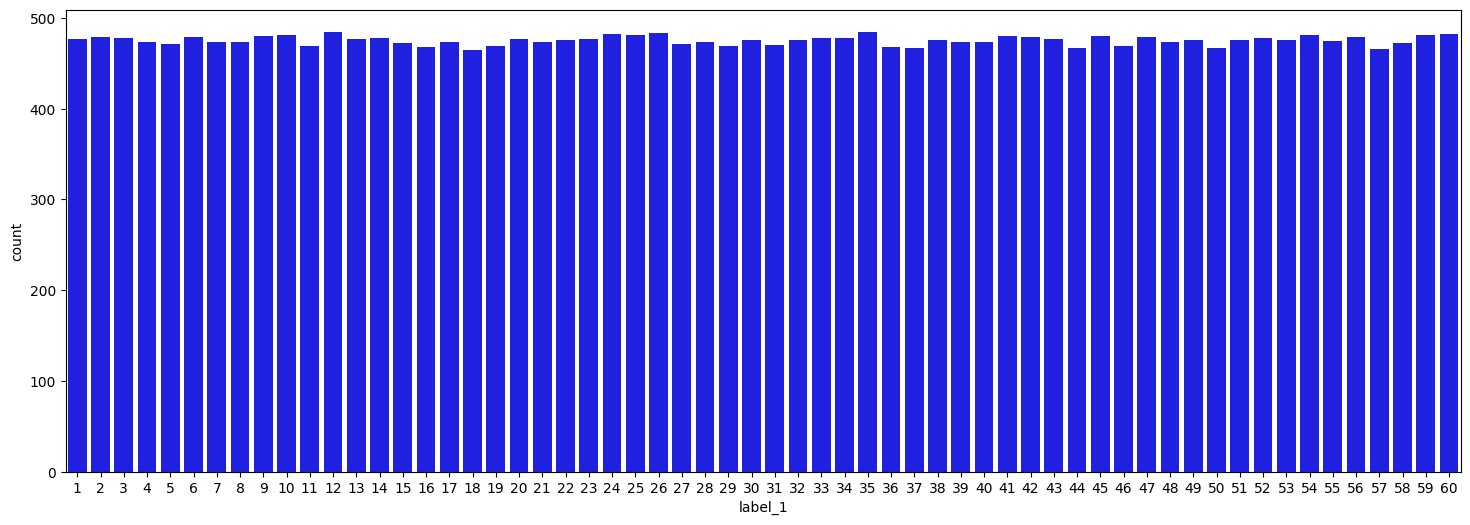

In [12]:
import matplotlib.pyplot as plt
import seaborn as sn

L1 = 'label_1'

plt.figure(figsize=(18,6))
sn.countplot(data=y_train, x=L1, color='blue')

#### Initial Accuracy

In [13]:
accuracy = svm_classifier(x_train[L1], y_train[L1], x_valid[L1], y_valid[L1])
print(f"Accuracy = {accuracy}")
# accuracy = xgb_classifier(x_train[L1], y_train[L1]-1, x_valid[L1], y_valid[L1]-1)
# print(f"Accuracy = {accuracy}")

Accuracy = 0.9733333333333334


#### Correlation

In [14]:
corr_matrix_l1 = x_train[L1].corr()

In [15]:
corr_matrix_l1

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
feature_1,1.000000,0.267338,0.071490,0.414422,0.036982,0.207898,0.118319,0.147709,0.368570,-0.190114,...,0.294503,0.016181,0.253096,-0.245060,0.423731,0.443474,0.216448,-0.372152,0.081136,0.266223
feature_2,0.267338,1.000000,-0.027042,0.004284,0.009556,-0.175189,0.118727,0.047381,0.146719,0.004041,...,0.036397,0.120084,0.058233,-0.095840,0.066372,0.357378,0.107098,0.008878,-0.021500,0.233835
feature_3,0.071490,-0.027042,1.000000,0.005692,0.187217,-0.184922,-0.071054,-0.217118,0.112494,-0.045269,...,-0.054550,0.048824,-0.087434,0.183482,-0.184763,-0.133512,-0.018046,0.164799,-0.030219,0.204483
feature_4,0.414422,0.004284,0.005692,1.000000,-0.017515,0.295999,-0.119338,0.077402,0.123430,-0.147437,...,0.402941,-0.048514,0.175835,-0.130880,0.364475,0.317812,0.156064,-0.313222,0.200493,0.071073
feature_5,0.036982,0.009556,0.187217,-0.017515,1.000000,-0.139041,-0.020940,-0.116694,0.187147,-0.095713,...,0.002091,0.094546,0.062270,0.143789,-0.263428,0.032675,-0.091599,0.159690,-0.051591,-0.072895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_764,0.443474,0.357378,-0.133512,0.317812,0.032675,0.202273,0.078858,0.117481,0.085433,-0.282476,...,0.192540,0.068779,0.145485,-0.230508,0.315251,1.000000,0.204746,-0.159590,0.181170,0.216180
feature_765,0.216448,0.107098,-0.018046,0.156064,-0.091599,-0.113032,-0.079667,0.106025,0.118023,-0.205155,...,0.213167,0.136531,0.093549,-0.129885,0.327689,0.204746,1.000000,-0.117247,0.154951,0.388355
feature_766,-0.372152,0.008878,0.164799,-0.313222,0.159690,-0.411833,-0.139678,-0.374096,-0.342061,0.119664,...,-0.559327,0.201898,-0.053654,0.334765,-0.503721,-0.159590,-0.117247,1.000000,-0.224632,0.129305
feature_767,0.081136,-0.021500,-0.030219,0.200493,-0.051591,0.173833,-0.109424,0.160097,0.017900,-0.064848,...,0.242810,-0.086578,-0.004117,-0.247390,0.280897,0.181170,0.154951,-0.224632,1.000000,0.043913


In [16]:
def get_corr_features(corr_matrix, threshold):

  correlated_features = []

  for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
      if (abs(corr_matrix.iloc[i, j]) > threshold):
        col_name = corr_matrix.columns[j]
        if col_name not in correlated_features:
          correlated_features.append(col_name)

  return correlated_features

In [17]:
correlated_features_l1 = get_corr_features(corr_matrix_l1, 0.7)
print(len(correlated_features_l1))

27


#### PCA

In [18]:
from sklearn.preprocessing import StandardScaler

x_test_l1 = x_test.copy()

scaler = StandardScaler()
x_train[L1] = pd.DataFrame(scaler.fit_transform(x_train[L1]), columns=FEATURES)
x_valid[L1] = pd.DataFrame(scaler.transform(x_valid[L1]), columns=FEATURES)
x_test_l1 = pd.DataFrame(scaler.transform(x_test_l1), columns=FEATURES)

In [19]:
from sklearn.decomposition import PCA

threshold = 0.96

pca = PCA(n_components=threshold, svd_solver='full')
x_train_l1_pca = pd.DataFrame(pca.fit_transform(x_train[L1]))
x_valid_l1_pca = pd.DataFrame(pca.transform(x_valid[L1]))
x_test_l1_pca = pd.DataFrame(pca.transform(x_test_l1))

explained_variance = pca.explained_variance_ratio_

print(f"Number of features: {len(explained_variance)}")

Number of features: 311


In [20]:
accuracy_1 = svm_classifier(x_train_l1_pca, y_train[L1], x_valid_l1_pca, y_valid[L1])
print(f"Accuracy = {accuracy_1}")

Accuracy = 0.9573333333333334


#### Hyperparameter Tuning - Random Grid Search

In [65]:
param_dist = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': np.logspace(-3, 3, 7)
}
cv = 2
n_iter = 5
svm = SVC()

# random_search_l1 = grid_search(svm, param_dist, cv, x_train_l1_pca, y_train[L1])
random_search_l1 = random_grid_search(svm, param_dist, cv, n_iter, x_train_l1_pca, y_train[L1])
best_model_l1 = random_search_l1.best_estimator_
best_accuracy_l1 = random_search_l1.best_score_
best_param = random_search_l1.best_params_

print(best_param)
print(best_accuracy_l1)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
{'kernel': 'linear', 'gamma': 1000.0, 'C': 0.01}
0.9408134642356241


In [66]:
y_pred_l1 = best_model_l1.predict(x_valid_l1_pca)
accuracy = accuracy_score(y_valid[L1], y_pred_l1)
print(f"Accuracy after: {accuracy}")

Accuracy after: 0.96


#### Cross Validation

In [24]:
model = SVC(kernel= best_param['kernel'], gamma= best_param['gamma'], C= best_param['C'])

k_fold_cross_validation(model, 5, x_train_l1_pca, y_train[L1])

Cross-Validation Scores: [0.94915849 0.94950912 0.94775596 0.94950912 0.95091164]
Mean Score: 0.9493688639551191
Standard Deviation: 0.0010065007078827013


## Label 2

<AxesSubplot: xlabel='label_2', ylabel='count'>

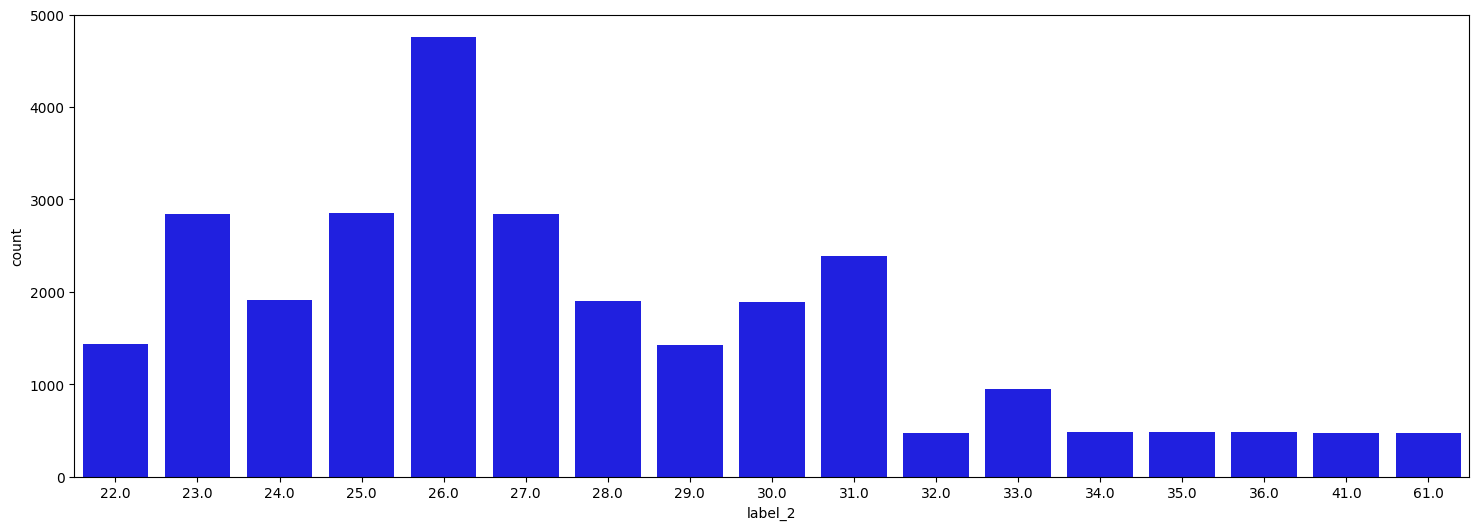

In [25]:
import matplotlib.pyplot as plt
import seaborn as sn

L2 = 'label_2'

plt.figure(figsize=(18,6))
sn.countplot(data=y_train, x=L2, color='blue')

#### Initial Accuracy

In [26]:
accuracy = weighted_svm_classifier(x_train[L2], y_train[L2], x_valid[L2], y_valid[L2])
print(f"Accuracy = {accuracy}")

Accuracy = 0.8546195652173914


#### Correlation

In [27]:
corr_matrix_l2 = x_train[L2].corr()

In [28]:
corr_matrix_l2

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
feature_1,1.000000,0.267813,0.070144,0.417878,0.033714,0.209910,0.116550,0.150595,0.370029,-0.189436,...,0.297201,0.018032,0.255393,-0.246138,0.426069,0.446561,0.215418,-0.375987,0.081306,0.264334
feature_2,0.267813,1.000000,-0.026523,0.009167,0.009995,-0.172705,0.113808,0.049757,0.149616,0.001501,...,0.038700,0.123209,0.061163,-0.094431,0.069125,0.359796,0.106820,0.006775,-0.018043,0.232196
feature_3,0.070144,-0.026523,1.000000,0.005353,0.180449,-0.186466,-0.071249,-0.211689,0.111781,-0.041346,...,-0.051653,0.044712,-0.088962,0.182082,-0.181114,-0.131502,-0.012662,0.162441,-0.027672,0.208699
feature_4,0.417878,0.009167,0.005353,1.000000,-0.022295,0.292640,-0.112259,0.076150,0.122772,-0.138988,...,0.402741,-0.049930,0.172788,-0.137451,0.368121,0.322847,0.151794,-0.320019,0.190503,0.074772
feature_5,0.033714,0.009995,0.180449,-0.022295,1.000000,-0.142908,-0.017537,-0.114017,0.186643,-0.087017,...,0.005789,0.091802,0.062721,0.142031,-0.260692,0.033650,-0.093082,0.155329,-0.058548,-0.075744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_764,0.446561,0.359796,-0.131502,0.322847,0.033650,0.205621,0.080360,0.118297,0.087449,-0.285009,...,0.193659,0.071836,0.151612,-0.229925,0.320523,1.000000,0.202905,-0.159847,0.185768,0.216945
feature_765,0.215418,0.106820,-0.012662,0.151794,-0.093082,-0.115739,-0.084028,0.103865,0.115217,-0.206392,...,0.212146,0.141885,0.090349,-0.128055,0.325169,0.202905,1.000000,-0.116333,0.149274,0.386537
feature_766,-0.375987,0.006775,0.162441,-0.320019,0.155329,-0.415908,-0.136781,-0.373673,-0.345407,0.124422,...,-0.560405,0.202560,-0.053245,0.331708,-0.502737,-0.159847,-0.116333,1.000000,-0.227493,0.127959
feature_767,0.081306,-0.018043,-0.027672,0.190503,-0.058548,0.168175,-0.102376,0.156081,0.014244,-0.058061,...,0.240173,-0.086312,-0.008781,-0.256112,0.283299,0.185768,0.149274,-0.227493,1.000000,0.047130


In [29]:
def get_corr_features(corr_matrix, threshold):

  correlated_features = []

  for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
      if (abs(corr_matrix.iloc[i, j]) > threshold):
        col_name = corr_matrix.columns[j]
        if col_name not in correlated_features:
          correlated_features.append(col_name)

  return correlated_features

In [30]:
correlated_features_l2 = get_corr_features(corr_matrix_l2, 0.7)
print(len(correlated_features_l2))

27


#### PCA

In [31]:
from sklearn.preprocessing import StandardScaler

x_test_l2 = x_test.copy()

scaler = StandardScaler()
x_train[L2] = pd.DataFrame(scaler.fit_transform(x_train[L2]), columns=FEATURES)
x_valid[L2] = pd.DataFrame(scaler.transform(x_valid[L2]), columns=FEATURES)
x_test_l2 = pd.DataFrame(scaler.transform(x_test_l2), columns=FEATURES)

In [32]:
from sklearn.decomposition import PCA

threshold = 0.96

pca = PCA(n_components=threshold, svd_solver='full')
x_train_l2_pca = pd.DataFrame(pca.fit_transform(x_train[L2]))
x_valid_l2_pca = pd.DataFrame(pca.transform(x_valid[L2]))
x_test_l2_pca = pd.DataFrame(pca.transform(x_test_l2))

explained_variance = pca.explained_variance_ratio_

print(f"Number of features: {len(explained_variance)}")

Number of features: 310


In [33]:
accuracy_1 = weighted_svm_classifier(x_train_l2_pca, y_train[L2], x_valid_l2_pca, y_valid[L2])
print(f"Accuracy = {accuracy_1}")

Accuracy = 0.8165760869565217


#### Hyperparameter Tuning - Random Grid Search

In [34]:
param_dist = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': np.logspace(-3, 3, 7),
    'class_weight': ['balanced']
}
cv = 2
n_iter = 5
svm = SVC()

random_search_l2 = random_grid_search(svm, param_dist, cv, n_iter, x_train_l2_pca, y_train[L2])
best_model_l2 = random_search_l2.best_estimator_
best_accuracy_l2 = random_search_l2.best_score_
best_param = random_search_l2.best_params_

print(best_param)
print(best_accuracy_l2)


Fitting 2 folds for each of 5 candidates, totalling 10 fits


{'kernel': 'poly', 'gamma': 0.1, 'class_weight': 'balanced', 'C': 1000.0}
0.2671540656205421


In [35]:
y_pred_l2 = best_model_l2.predict(x_valid_l2_pca)
accuracy = accuracy_score(y_valid[L2], y_pred_l2)
print(f"Accuracy after: {accuracy}")

Accuracy after: 0.9524456521739131


#### Cross Validation

In [36]:
model = SVC(kernel= best_param['kernel'], gamma= best_param['gamma'], class_weight= 'balanced', C= best_param['C'])


k_fold_cross_validation(model, 5, x_train_l2_pca, y_train[L2])

Cross-Validation Scores: [0.45952211 0.72075606 0.74643367 0.74054922 0.52549929]
Mean Score: 0.6385520684736091
Standard Deviation: 0.12135238837544056


## Label 3

<AxesSubplot: xlabel='label_3', ylabel='count'>

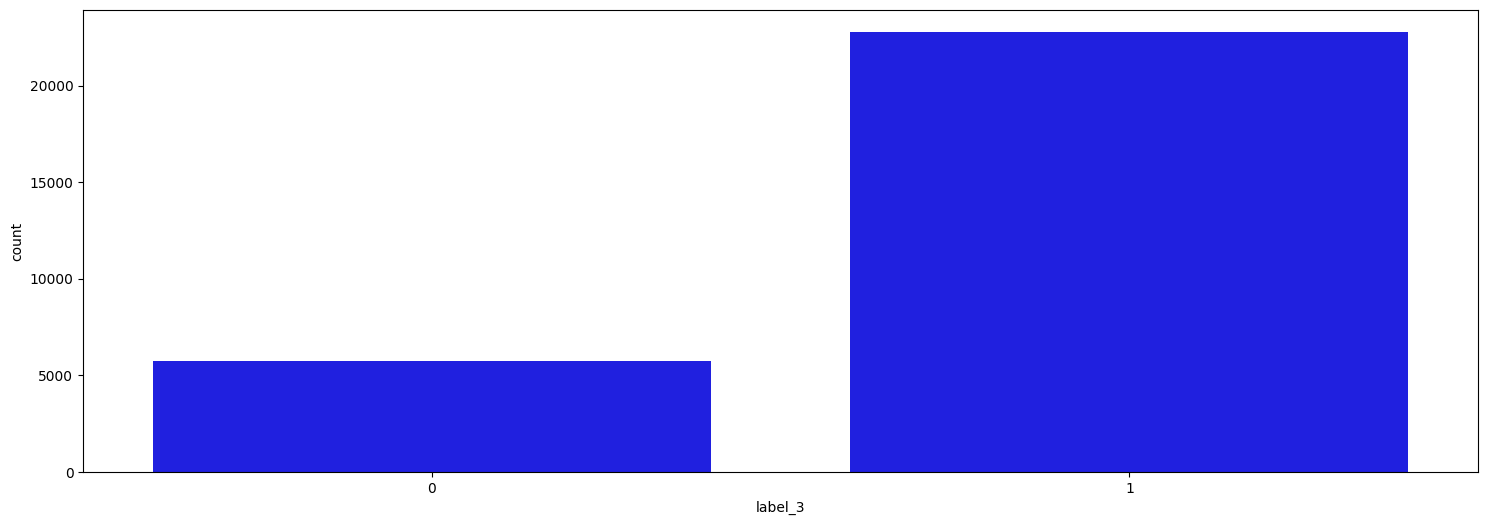

In [37]:
import matplotlib.pyplot as plt
import seaborn as sn

L3 = 'label_3'

plt.figure(figsize=(18,6))
sn.countplot(data=y_train, x=L3, color='blue')

#### Initial Accuracy

In [38]:
accuracy = weighted_svm_classifier(x_train[L3], y_train[L3], x_valid[L3], y_valid[L3])
print(f"Accuracy = {accuracy}")

Accuracy = 0.9893333333333333


#### Correlation

In [39]:
corr_matrix_l3 = x_train[L3].corr()

In [40]:
corr_matrix_l3

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
feature_1,1.000000,0.267338,0.071490,0.414422,0.036982,0.207898,0.118319,0.147709,0.368570,-0.190114,...,0.294503,0.016181,0.253096,-0.245060,0.423731,0.443474,0.216448,-0.372152,0.081136,0.266223
feature_2,0.267338,1.000000,-0.027042,0.004284,0.009556,-0.175189,0.118727,0.047381,0.146719,0.004041,...,0.036397,0.120084,0.058233,-0.095840,0.066372,0.357378,0.107098,0.008878,-0.021500,0.233835
feature_3,0.071490,-0.027042,1.000000,0.005692,0.187217,-0.184922,-0.071054,-0.217118,0.112494,-0.045269,...,-0.054550,0.048824,-0.087434,0.183482,-0.184763,-0.133512,-0.018046,0.164799,-0.030219,0.204483
feature_4,0.414422,0.004284,0.005692,1.000000,-0.017515,0.295999,-0.119338,0.077402,0.123430,-0.147437,...,0.402941,-0.048514,0.175835,-0.130880,0.364475,0.317812,0.156064,-0.313222,0.200493,0.071073
feature_5,0.036982,0.009556,0.187217,-0.017515,1.000000,-0.139041,-0.020940,-0.116694,0.187147,-0.095713,...,0.002091,0.094546,0.062270,0.143789,-0.263428,0.032675,-0.091599,0.159690,-0.051591,-0.072895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_764,0.443474,0.357378,-0.133512,0.317812,0.032675,0.202273,0.078858,0.117481,0.085433,-0.282476,...,0.192540,0.068779,0.145485,-0.230508,0.315251,1.000000,0.204746,-0.159590,0.181170,0.216180
feature_765,0.216448,0.107098,-0.018046,0.156064,-0.091599,-0.113032,-0.079667,0.106025,0.118023,-0.205155,...,0.213167,0.136531,0.093549,-0.129885,0.327689,0.204746,1.000000,-0.117247,0.154951,0.388355
feature_766,-0.372152,0.008878,0.164799,-0.313222,0.159690,-0.411833,-0.139678,-0.374096,-0.342061,0.119664,...,-0.559327,0.201898,-0.053654,0.334765,-0.503721,-0.159590,-0.117247,1.000000,-0.224632,0.129305
feature_767,0.081136,-0.021500,-0.030219,0.200493,-0.051591,0.173833,-0.109424,0.160097,0.017900,-0.064848,...,0.242810,-0.086578,-0.004117,-0.247390,0.280897,0.181170,0.154951,-0.224632,1.000000,0.043913


In [41]:
def get_corr_features(corr_matrix, threshold):

  correlated_features = []

  for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
      if (abs(corr_matrix.iloc[i, j]) > threshold):
        col_name = corr_matrix.columns[j]
        if col_name not in correlated_features:
          correlated_features.append(col_name)

  return correlated_features

In [42]:
correlated_features_l3 = get_corr_features(corr_matrix_l3, 0.7)
print(len(correlated_features_l3))

27


#### PCA

In [43]:
from sklearn.preprocessing import StandardScaler

x_test_l3 = x_test.copy()

scaler = StandardScaler()
x_train[L3] = pd.DataFrame(scaler.fit_transform(x_train[L3]), columns=FEATURES)
x_valid[L3] = pd.DataFrame(scaler.transform(x_valid[L3]), columns=FEATURES)
x_test_l3 = pd.DataFrame(scaler.transform(x_test_l3), columns=FEATURES)

In [44]:
from sklearn.decomposition import PCA

threshold = 0.96

pca = PCA(n_components=threshold, svd_solver='full')
x_train_l3_pca = pd.DataFrame(pca.fit_transform(x_train[L3]))
x_valid_l3_pca = pd.DataFrame(pca.transform(x_valid[L3]))
x_test_l3_pca = pd.DataFrame(pca.transform(x_test_l3))

explained_variance = pca.explained_variance_ratio_

print(f"Number of features: {len(explained_variance)}")

Number of features: 311


In [45]:
accuracy_1 = weighted_svm_classifier(x_train_l3_pca, y_train[L3], x_valid_l3_pca, y_valid[L3])
print(f"Accuracy = {accuracy_1}")

Accuracy = 0.9906666666666667


#### Hyperparameter Tuning - Random Grid Search

In [46]:
param_dist = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': np.logspace(-3, 3, 7),
    'class_weight': ['balanced']
}
cv = 2
n_iter = 5
svm = SVC()

random_search_l3 = random_grid_search(svm, param_dist, cv, n_iter, x_train_l3_pca, y_train[L3])
best_model_l3 = random_search_l3.best_estimator_
best_accuracy_l3 = random_search_l3.best_score_
best_param = random_search_l3.best_params_

print(best_param)
print(best_accuracy_l3)


Fitting 2 folds for each of 5 candidates, totalling 10 fits
{'kernel': 'linear', 'gamma': 0.1, 'class_weight': 'balanced', 'C': 0.001}
0.9715988779803647


In [47]:
y_pred_l3 = best_model_l3.predict(x_valid_l3_pca)
accuracy = accuracy_score(y_valid[L3], y_pred_l3)
print(f"Accuracy after: {accuracy}")

Accuracy after: 0.9853333333333333


#### Cross Validation

In [48]:
model = SVC(kernel= best_param['kernel'], gamma= best_param['gamma'], class_weight= 'balanced', C= best_param['C'])

k_fold_cross_validation(model, 5, x_train_l3_pca, y_train[L3])

Cross-Validation Scores: [0.96861851 0.98913043 0.98229313 0.98071529 0.9943899 ]
Mean Score: 0.9830294530154278
Standard Deviation: 0.008716128675680182


## Label 4

<AxesSubplot: xlabel='label_4', ylabel='count'>

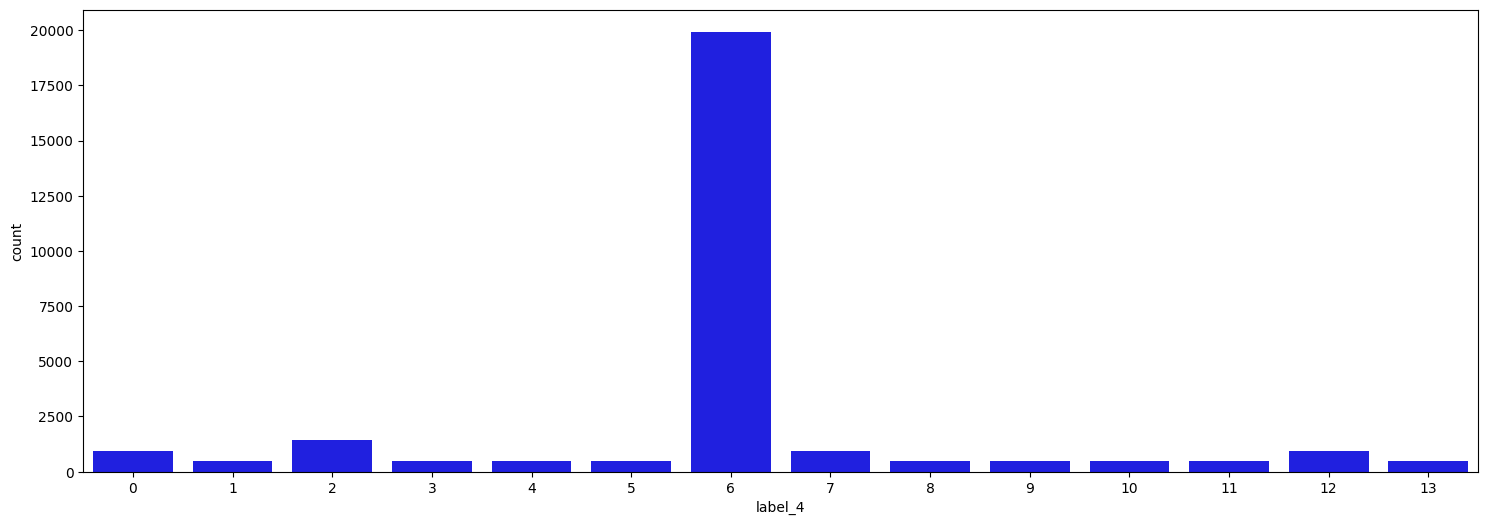

In [49]:
import matplotlib.pyplot as plt
import seaborn as sn

L4 = 'label_4'

plt.figure(figsize=(18,6))
sn.countplot(data=y_train, x=L4, color='blue')

#### Initial Accuracy

In [50]:
accuracy = weighted_svm_classifier(x_train[L4], y_train[L4], x_valid[L4], y_valid[L4])
print(f"Accuracy = {accuracy}")

Accuracy = 0.892


#### Correlation

In [51]:
corr_matrix_l4 = x_train[L4].corr()

In [52]:
corr_matrix_l4

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_759,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768
feature_1,1.000000,0.267338,0.071490,0.414422,0.036982,0.207898,0.118319,0.147709,0.368570,-0.190114,...,0.294503,0.016181,0.253096,-0.245060,0.423731,0.443474,0.216448,-0.372152,0.081136,0.266223
feature_2,0.267338,1.000000,-0.027042,0.004284,0.009556,-0.175189,0.118727,0.047381,0.146719,0.004041,...,0.036397,0.120084,0.058233,-0.095840,0.066372,0.357378,0.107098,0.008878,-0.021500,0.233835
feature_3,0.071490,-0.027042,1.000000,0.005692,0.187217,-0.184922,-0.071054,-0.217118,0.112494,-0.045269,...,-0.054550,0.048824,-0.087434,0.183482,-0.184763,-0.133512,-0.018046,0.164799,-0.030219,0.204483
feature_4,0.414422,0.004284,0.005692,1.000000,-0.017515,0.295999,-0.119338,0.077402,0.123430,-0.147437,...,0.402941,-0.048514,0.175835,-0.130880,0.364475,0.317812,0.156064,-0.313222,0.200493,0.071073
feature_5,0.036982,0.009556,0.187217,-0.017515,1.000000,-0.139041,-0.020940,-0.116694,0.187147,-0.095713,...,0.002091,0.094546,0.062270,0.143789,-0.263428,0.032675,-0.091599,0.159690,-0.051591,-0.072895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_764,0.443474,0.357378,-0.133512,0.317812,0.032675,0.202273,0.078858,0.117481,0.085433,-0.282476,...,0.192540,0.068779,0.145485,-0.230508,0.315251,1.000000,0.204746,-0.159590,0.181170,0.216180
feature_765,0.216448,0.107098,-0.018046,0.156064,-0.091599,-0.113032,-0.079667,0.106025,0.118023,-0.205155,...,0.213167,0.136531,0.093549,-0.129885,0.327689,0.204746,1.000000,-0.117247,0.154951,0.388355
feature_766,-0.372152,0.008878,0.164799,-0.313222,0.159690,-0.411833,-0.139678,-0.374096,-0.342061,0.119664,...,-0.559327,0.201898,-0.053654,0.334765,-0.503721,-0.159590,-0.117247,1.000000,-0.224632,0.129305
feature_767,0.081136,-0.021500,-0.030219,0.200493,-0.051591,0.173833,-0.109424,0.160097,0.017900,-0.064848,...,0.242810,-0.086578,-0.004117,-0.247390,0.280897,0.181170,0.154951,-0.224632,1.000000,0.043913


In [53]:
def get_corr_features(corr_matrix, threshold):

  correlated_features = []

  for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
      if (abs(corr_matrix.iloc[i, j]) > threshold):
        col_name = corr_matrix.columns[j]
        if col_name not in correlated_features:
          correlated_features.append(col_name)

  return correlated_features

In [54]:
correlated_features_l4 = get_corr_features(corr_matrix_l4, 0.7)
print(len(correlated_features_l4))

27


#### PCA

In [55]:
from sklearn.preprocessing import StandardScaler

x_test_l4 = x_test.copy()

scaler = StandardScaler()
x_train[L4] = pd.DataFrame(scaler.fit_transform(x_train[L4]), columns=FEATURES)
x_valid[L4] = pd.DataFrame(scaler.transform(x_valid[L4]), columns=FEATURES)
x_test_l4 = pd.DataFrame(scaler.transform(x_test_l4), columns=FEATURES)

In [56]:
from sklearn.decomposition import PCA

threshold = 0.96

pca = PCA(n_components=threshold, svd_solver='full')
x_train_l4_pca = pd.DataFrame(pca.fit_transform(x_train[L4]))
x_valid_l4_pca = pd.DataFrame(pca.transform(x_valid[L4]))
x_test_l4_pca = pd.DataFrame(pca.transform(x_test_l4))

explained_variance = pca.explained_variance_ratio_

print(f"Number of features: {len(explained_variance)}")

Number of features: 311


In [57]:
accuracy_1 = weighted_svm_classifier(x_train_l4_pca, y_train[L4], x_valid_l4_pca, y_valid[L4])
print(f"Accuracy = {accuracy_1}")

Accuracy = 0.8946666666666667


#### Hyperparameter Tuning - Random Grid Search

In [58]:
param_dist = {
    'C': np.logspace(-3, 3, 7),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': np.logspace(-3, 3, 7),
    'class_weight': ['balanced']
}
cv = 2
n_iter = 5
svm = SVC()

random_search_l4 = random_grid_search(svm, param_dist, cv, n_iter, x_train_l4_pca, y_train[L4])
best_model_l4 = random_search_l4.best_estimator_
best_accuracy_l4 = random_search_l4.best_score_
best_param = random_search_l4.best_params_

print(best_param)
print(best_accuracy_l4)


Fitting 2 folds for each of 5 candidates, totalling 10 fits
{'kernel': 'poly', 'gamma': 100.0, 'class_weight': 'balanced', 'C': 10.0}
0.8137798036465638


In [59]:
y_pred_l4 = best_model_l4.predict(x_valid_l1_pca)
accuracy = accuracy_score(y_valid[L4], y_pred_l4)
print(f"Accuracy after: {accuracy}")

Accuracy after: 0.972


#### Cross Validation

In [60]:
model = SVC(kernel= best_param['kernel'], gamma= best_param['gamma'], class_weight= 'balanced', C= best_param['C'])

k_fold_cross_validation(model, 5, x_train_l4_pca, y_train[L4])

Cross-Validation Scores: [0.94109397 0.93302945 0.94179523 0.95178822 0.92303647]
Mean Score: 0.938148667601683
Standard Deviation: 0.009618675498463689


## Prediciton

In [61]:
# Label 1
pred_l1 = best_model_l1.predict(x_test_l1_pca)
# Label 2
pred_l2 = best_model_l2.predict(x_test_l2_pca)
# Label 3
pred_l3 = best_model_l3.predict(x_test_l3_pca)
# Label 4
pred_l4 = best_model_l4.predict(x_test_l4_pca)

In [62]:
id_list = test_df['ID']

result = {
    'ID': id_list,
    'label_1': pred_l1,
    'label_2': pred_l2,
    'label_3': pred_l3,
    'label_4': pred_l4
}

result_df = pd.DataFrame(result)

result_df.to_csv('layer_10.csv', index=False)
